# Brain Tumor Classification

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import  keras
from keras.preprocessing.image import load_img,img_to_array,array_to_img
from os import listdir
import imutils

C:\Users\MAHE\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.


# Converting image to Numpy

In [107]:
X=[]
Y=[]

for directory in listdir('aug/'):
    for filename in listdir('aug/'+ directory):
        img = load_img('aug/'+directory+'/'+filename)
        img=img.resize((240,240))
        #img1=img_to_array(img)
        img=img_to_array(img)/255
        #X1.append(img1)
        X.append(img)
        if directory=='no':
            Y.append(0)
        else :
            Y.append(1)

np.array(X).shape

np.array(Y).shape

(2271,)

In [108]:
print(np.array(X).shape,np.array(Y).shape,sep="\n")

(2271, 240, 240, 3)
(2271,)


In [109]:
train_X=np.array(X)
train_Y=np.array(Y).reshape((2271,1))

In [110]:
train_X.shape

(2271, 240, 240, 3)

In [111]:
train_Y.shape

(2271, 1)

In [112]:
from sklearn.utils import shuffle

In [113]:
train_X,train_Y=shuffle(train_X,train_Y)

# Splitting the data

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_val, y_train, y_val = train_test_split(train_X, train_Y, test_size=0.3, random_state=42)

In [116]:
X_val,X_test,y_val,y_test=train_test_split(X_val,y_val,test_size=.5,random_state=42)

In [117]:
X_val.shape

(341, 240, 240, 3)

In [118]:
X_test.shape

(341, 240, 240, 3)

In [119]:
X_train.shape

(1589, 240, 240, 3)

In [120]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten,ZeroPadding2D

# Building the CNN Model

In [266]:
model=Sequential()

In [267]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[240, 240, 3]))
model.add(ZeroPadding2D((2, 2)))
model.add(MaxPool2D(pool_size=(4, 4)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(4,4)))

In [268]:
model.add(Flatten())

In [269]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

In [270]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Training

##### after many different combination, this was gave the best results on the test data

In [271]:
model.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),epochs=14,batch_size=32,verbose=1)

Train on 1589 samples, validate on 341 samples
Epoch 1/14
1589/1589 [==============================] - 56s 35ms/step - loss: 0.6543 - accuracy: 0.6287 - val_loss: 0.5657 - val_accuracy: 0.7009
Epoch 2/14
1589/1589 [==============================] - 53s 33ms/step - loss: 0.5822 - accuracy: 0.7143 - val_loss: 0.5375 - val_accuracy: 0.7390
Epoch 3/14
1589/1589 [==============================] - 56s 35ms/step - loss: 0.5547 - accuracy: 0.7332 - val_loss: 0.5198 - val_accuracy: 0.7742
Epoch 4/14
1589/1589 [==============================] - 54s 34ms/step - loss: 0.5008 - accuracy: 0.7646 - val_loss: 0.4744 - val_accuracy: 0.7918
Epoch 5/14
1589/1589 [==============================] - 52s 33ms/step - loss: 0.4601 - accuracy: 0.7892 - val_loss: 0.4295 - val_accuracy: 0.8152
Epoch 6/14
1589/1589 [==============================] - 53s 34ms/step - loss: 0.4225 - accuracy: 0.8106 - val_loss: 0.4420 - val_accuracy: 0.7918
Epoch 7/14
1589/1589 [==============================] - 53s 34ms/step - loss:

In [280]:
loss=pd.DataFrame(model.history.history)

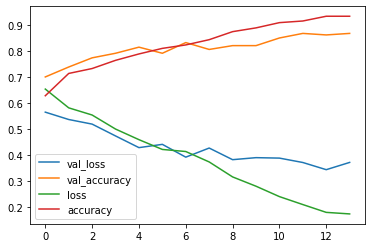

In [281]:
loss.plot()

In [282]:
prediction=model.predict_classes(X_test)

In [283]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report,accuracy_score

In [284]:
confusion_matrix(y_test,prediction)

array([[148,  32],
       [ 24, 137]], dtype=int64)

In [285]:
accuracy_score(y_test,prediction)

0.8357771260997068

In [286]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 238, 238, 32)      896       
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 242, 242, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 58, 58, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)             

In [287]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       180
           1       0.81      0.85      0.83       161

    accuracy                           0.84       341
   macro avg       0.84      0.84      0.84       341
weighted avg       0.84      0.84      0.84       341



# CNN model validation and test set accuracies
##### 83.57% on the Test Data
##### 86.80% on validation Data

# Try other Classifiers

In [33]:
X1=[]
Y1=[]

for directory in listdir('aug/'):
    for filename in listdir('aug/'+ directory):
        img = load_img('aug/'+directory+'/'+filename)
        img=img.resize((240,240))
        img=img_to_array(img)
        X1.append(img)
        if directory=='no':
            Y1.append(0)
        else :
              Y1.append(1)

np.array(X1).shape

np.array(Y1).shape

(2271,)

In [35]:
train_X1=np.array(X1)
Y1=np.array(Y1)

### Reshape into a 2D array/ Flattening

In [36]:
train_x_flatten = train_X1.reshape(train_X1.shape[0],train_X1.shape[1]*train_X1.shape[2]*train_X1.shape[3])

In [37]:
print((train_x_flatten[1]>255)==True)

[False False False ... False False False]


In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [40]:
X1_train,X1_test,y1_train,y1_test=train_test_split(train_x_flatten,Y1,test_size=0.2,random_state=42)

In [42]:
scale=MinMaxScaler()
X1_train=scale.fit_transform(X1_train)
X1_test=scale.transform(X1_test)

# Logistic Regression 

In [43]:
from sklearn.linear_model import LogisticRegression

C:\Users\MAHE\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [44]:
classifier=LogisticRegression()

In [45]:
classifier.fit(X1_train,y1_train.reshape(-1))

C:\Users\MAHE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
prediction=classifier.predict(X1_test)

In [47]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report,accuracy_score

In [48]:
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       232
           1       0.65      0.65      0.65       223

    accuracy                           0.66       455
   macro avg       0.66      0.66      0.66       455
weighted avg       0.66      0.66      0.66       455



In [49]:
accuracy_score(y1_test,prediction)

0.6593406593406593

In [50]:
confusion_matrix(y1_test,prediction)

array([[156,  76],
       [ 79, 144]], dtype=int64)

# SVM classifier

In [72]:
from sklearn.svm import SVC


In [73]:
classifier=SVC(C=1,kernel='rbf')

In [74]:
classifier.fit(X1_train,y1_train)

C:\Users\MAHE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [75]:
prediction=classifier.predict(X1_test)

In [76]:
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69       232
           1       0.68      0.72      0.70       223

    accuracy                           0.70       455
   macro avg       0.70      0.70      0.70       455
weighted avg       0.70      0.70      0.70       455



In [78]:
print(accuracy_score(y1_test,prediction))

0.6967032967032967


# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
classifier=RandomForestClassifier(n_estimators=70,criterion='entropy')

In [58]:
classifier.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
prediction=classifier.predict(X1_test)

In [61]:
print(classification_report(y1_test,prediction))

print(accuracy_score(y1_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77       232
           1       0.74      0.85      0.79       223

    accuracy                           0.78       455
   macro avg       0.79      0.78      0.78       455
weighted avg       0.79      0.78      0.78       455

0.7802197802197802


# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
classifier=DecisionTreeClassifier(criterion='entropy',splitter='random')

In [64]:
classifier.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [65]:
prediction=classifier.predict(X1_test)

In [66]:
print(classification_report(y1_test,prediction))

print(accuracy_score(y1_test,prediction))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       232
           1       0.68      0.70      0.69       223

    accuracy                           0.69       455
   macro avg       0.69      0.69      0.69       455
weighted avg       0.69      0.69      0.69       455

0.6945054945054945


# Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
classifier=GaussianNB()

In [69]:
classifier.fit(X1_train,y1_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [70]:
prediction=classifier.predict(X1_test)

In [71]:
print(classification_report(y1_test,prediction))

print(accuracy_score(y1_test,prediction))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       232
           1       0.71      0.56      0.63       223

    accuracy                           0.67       455
   macro avg       0.68      0.67      0.67       455
weighted avg       0.68      0.67      0.67       455

0.6747252747252748


# For  Grayscalled data

In [82]:
X2=[]
Y2=[]
for directory in listdir('aug/'):
    for filename in listdir('aug/'+ directory):
        img = load_img('aug/'+directory+'/'+filename,grayscale=True)# grayscale =True
        img=img.resize((240,240))
        img1=img_to_array(img)
        #img=img_to_array(img)/255
        X2.append(img1)
        if directory=='no':
            Y2.append(0)
        else :
            Y2.append(1)

np.array(X2).shape

np.array(Y2).shape

C:\Users\MAHE\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(2271,)

In [83]:
np.array(X2).shape

(2271, 240, 240, 1)

In [84]:
gray_X=np.array(X2).reshape((2271,240*240))/255

In [85]:
gray_y=np.array(Y2)

### Splitting

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(gray_X,gray_y,test_size=0.3,random_state=42)

### Random Forest

In [88]:
classifier=RandomForestClassifier(n_estimators=70,criterion='entropy',random_state=42)

classifier.fit(X_train,y_train)

prediction=classifier.predict(X_test)

In [89]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       343
           1       0.76      0.83      0.80       339

    accuracy                           0.79       682
   macro avg       0.79      0.79      0.79       682
weighted avg       0.79      0.79      0.79       682



In [90]:
accuracy_score(y_test,prediction)

0.7888563049853372

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
classifier=LogisticRegression()

In [21]:
classifier.fit(X_train,y_train)

C:\Users\MAHE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
prediction=classifier.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred=prediction)

0.6612903225806451

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
classifier=DecisionTreeClassifier(criterion='entropy',splitter='random')

In [40]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [41]:
prediction=classifier.predict(X_test)

In [42]:
accuracy_score(y_test,prediction)

0.6891495601173021

### SVM Classifier

In [29]:
from sklearn.svm import SVC

In [44]:
classifier=SVC()

In [45]:
classifier.fit(X_train,y_train)

C:\Users\MAHE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
prediction=classifier.predict(X_test)

In [47]:
accuracy_score(y_test,prediction)

0.6994134897360704

### Gaussian Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
classifier=GaussianNB()

In [36]:
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
prediction=classifier.predict(X_test)

In [38]:
accuracy_score(y_test,prediction)

0.6422287390029325